# Example of various pivpy methods

In [1]:
from pivpy import io, pivpy, graphics
import numpy as np
import xarray as xr
import os
import pkg_resources as pkg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f1 = 'Run000001.T000.D000.P000.H001.L.vec'
f2 = 'Run000002.T000.D000.P000.H001.L.vec'
path = pkg.resource_filename('pivpy','data/Insight')

a = io.load_vec(os.path.join(path,f1))
b = io.load_vec(os.path.join(path,f2))

AttributeError: 'str' object has no attribute 'name'

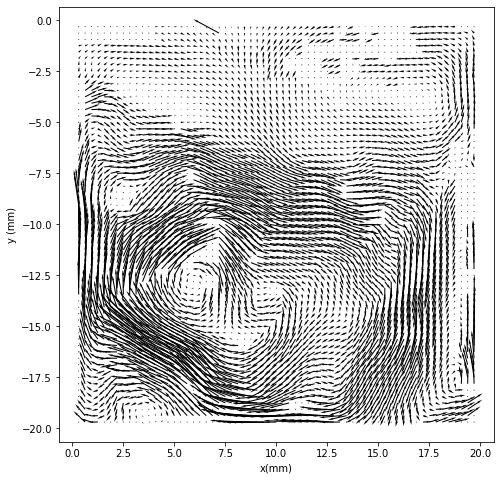

In [ ]:
# select where t = 1 (explicit time)
fig, ax = graphics.quiver(a.sel(t=1),arrScale=10)

#increase figure size
fig.set_size_inches(11,8)

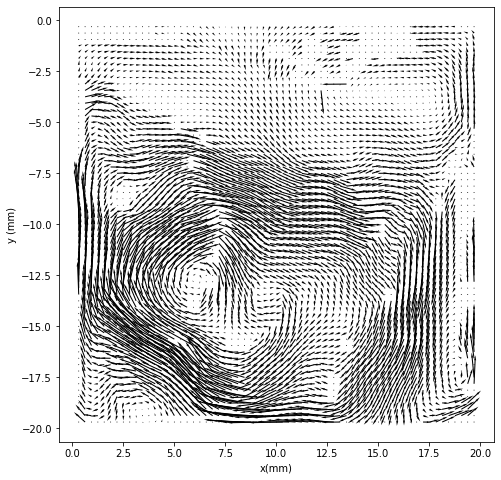

In [ ]:
# select just the first frame whatever t is .
b['t'] = b['t'] + 10
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(b.isel(t=0),arrScale=10,nthArr=2)

In [ ]:
c = a.piv.crop([5, 15,-5,-15])
a.u.shape, c.u.shape

((63, 63, 1), (32, 32, 1))

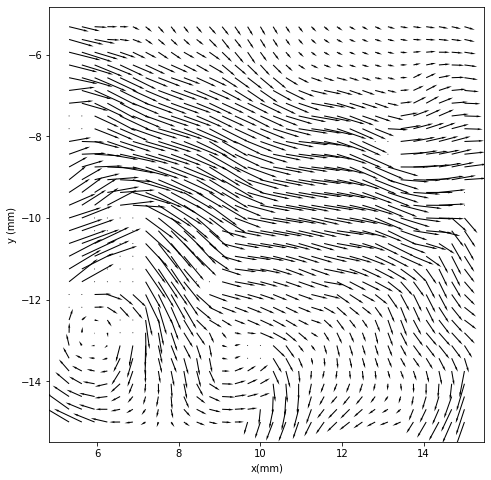

In [ ]:
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(c.isel(t=0),arrScale=10,nthArr=2)

In [ ]:
# want to play with some synthetic data? 
c = io.create_sample_dataset()
print(c)

<xarray.Dataset>
Dimensions:  (t: 5, x: 8, y: 5)
Coordinates:
  * x        (x) float64 32.0 64.0 96.0 128.0 160.0 192.0 224.0 256.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0
  * t        (t) int64 0 1 2 3 4
Data variables:
    u        (y, x, t) float64 1.0 1.0 1.0 1.0 1.0 ... 11.0 11.0 11.0 11.0 11.0
    v        (y, x, t) float64 0.521 0.8294 0.994 -0.1238 ... 1.149 -0.4557 2.13
    chc      (y, x, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    variables:  ['x', 'y', 'u', 'v']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt']
    dt:         1.0
    files:      


In [ ]:
# want to slice it and not crop? 
d = c.sel(x = slice(35,70),y=slice(30,90))
print(d)

<xarray.Dataset>
Dimensions:  (t: 5, x: 1, y: 4)
Coordinates:
  * x        (x) float64 64.0
  * y        (y) float64 32.0 48.0 64.0 80.0
  * t        (t) int64 0 1 2 3 4
Data variables:
    u        (y, x, t) float64 2.429 2.429 2.429 2.429 ... 2.429 2.429 2.429
    v        (y, x, t) float64 0.9037 0.2532 -1.617 1.726 ... 1.149 -0.4557 2.13
    chc      (y, x, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    variables:  ['x', 'y', 'u', 'v']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt']
    dt:         1.0
    files:      


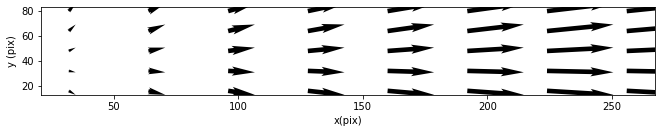

In [ ]:
# want to show an ensemble average of 10 frames?
data = io.create_sample_dataset(10)

# want to change the size of arrows and figure aspectratio?
fig,_=graphics.quiver(data.piv.average,arrScale=8,aspectratio=0.5)
fig.set_size_inches(11,8)

In [ ]:
data = io.create_sample_field()
data.piv.strain()

<xarray.Dataset>
Dimensions:  (t: 1, x: 8, y: 5)
Coordinates:
  * x        (x) float64 32.0 64.0 96.0 128.0 160.0 192.0 224.0 256.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0
  * t        (t) int64 0
Data variables:
    u        (y, x, t) float64 1.0 2.429 3.857 5.286 ... 6.714 8.143 9.571 11.0
    v        (y, x, t) float64 0.04548 0.04548 0.04548 ... 1.837 1.837 1.837
    chc      (y, x, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    w        (y, x, t) float64 0.006288 0.006288 0.006288 ... 0.01289 0.01289
Attributes:
    variables:  ['x', 'y', 'u', 'v', 'strain']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt', '1/dt']
    dt:         1.0
    files:

In [ ]:
data.piv.vorticity()
data

<xarray.Dataset>
Dimensions:  (t: 1, x: 8, y: 5)
Coordinates:
  * x        (x) float64 32.0 64.0 96.0 128.0 160.0 192.0 224.0 256.0
  * y        (y) float64 16.0 32.0 48.0 64.0 80.0
  * t        (t) int64 0
Data variables:
    u        (y, x, t) float64 1.0 2.429 3.857 5.286 ... 6.714 8.143 9.571 11.0
    v        (y, x, t) float64 0.04548 0.04548 0.04548 ... 1.837 1.837 1.837
    chc      (y, x, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    w        (y, x, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    variables:  ['x', 'y', 'u', 'v', 'vorticity']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt', '1/dt']
    dt:         1.0
    files: